<a href="https://colab.research.google.com/github/GiangAnhTuan-20146450/Bai-Tap-AI/blob/main/AI_W4_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=59914488835467dc651c9b773881f6b4fbeeb8cf06a78164862943cbb7ef630a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


91.66666666666666


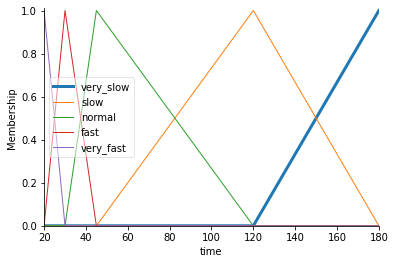

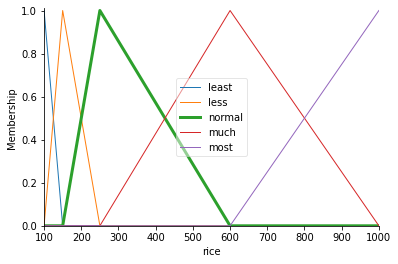

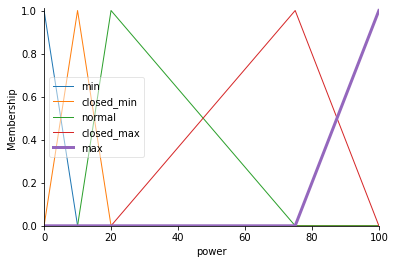

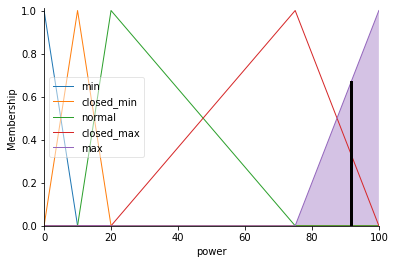

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(20,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['very_slow']= fuzz.trimf(time.universe,[120,180,180])
time['slow']= fuzz.trimf(time.universe,[45,120,180])
time['normal']= fuzz.trimf(time.universe,[30,45,120])
time['fast']= fuzz.trimf(time.universe,[20,30,45])
time['very_fast']= fuzz.trimf(time.universe,[20,20,30])

rice['least']= fuzz.trimf(rice.universe,[100,100,150])
rice['less']= fuzz.trimf(rice.universe,[100,150,250])
rice['normal']= fuzz.trimf(rice.universe,[150,250,600])
rice['much']= fuzz.trimf(rice.universe,[250,600,1000])
rice['most']= fuzz.trimf(rice.universe,[600,1000,1000])

power['min']= fuzz.trimf(power.universe,[0,0,10])
power['closed_min']= fuzz.trimf(power.universe,[0,10,20])
power['normal']= fuzz.trimf(power.universe,[10,20,75])
power['closed_max']= fuzz.trimf(power.universe,[20,75,100])
power['max']= fuzz.trimf(power.universe,[75,100,100])

time['very_slow'].view()
rice['normal'].view()
power['max'].view()

rule1= ctrl.Rule(time['very_slow']&rice['least'],power['min'])
rule2= ctrl.Rule(time['very_slow']&rice['less'],power['min'])
rule3= ctrl.Rule(time['very_slow']&rice['normal'],power['min'])
rule4= ctrl.Rule(time['very_slow']&rice['much'],power['closed_min'])
rule5= ctrl.Rule(time['very_slow']&rice['most'],power['closed_min'])

rule6= ctrl.Rule(time['slow']&rice['least'],power['min'])
rule7= ctrl.Rule(time['slow']&rice['less'],power['closed_min'])
rule8= ctrl.Rule(time['slow']&rice['normal'],power['closed_min'])
rule9= ctrl.Rule(time['slow']&rice['much'],power['normal'])
rule10= ctrl.Rule(time['slow']&rice['most'],power['normal'])

rule11= ctrl.Rule(time['normal']&rice['least'],power['closed_min'])
rule12= ctrl.Rule(time['normal']&rice['less'],power['closed_min'])
rule13= ctrl.Rule(time['normal']&rice['normal'],power['normal'])
rule14= ctrl.Rule(time['normal']&rice['much'],power['normal'])
rule15= ctrl.Rule(time['normal']&rice['most'],power['closed_max'])

rule16= ctrl.Rule(time['fast']&rice['least'],power['normal'])
rule17= ctrl.Rule(time['fast']&rice['less'],power['normal'])
rule18= ctrl.Rule(time['fast']&rice['normal'],power['closed_max'])
rule19= ctrl.Rule(time['fast']&rice['much'],power['closed_max'])
rule20= ctrl.Rule(time['fast']&rice['most'],power['max'])

rule21= ctrl.Rule(time['very_fast']&rice['least'],power['normal'])
rule22= ctrl.Rule(time['very_fast']&rice['less'],power['normal'])
rule23= ctrl.Rule(time['very_fast']&rice['normal'],power['closed_max'])
rule24= ctrl.Rule(time['very_fast']&rice['much'],power['max'])
rule25= ctrl.Rule(time['very_fast']&rice['most'],power['max'])

powering_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering= ctrl.ControlSystemSimulation(powering_ctrl)

powering.input['time']=20
powering.input['rice']=1000
powering.compute()
print(powering.output['power'])
power.view(sim=powering)